# RF CIC-IDS-2017

La última fase de la evaluación conlleva la evaluación de los modelos en dominios similares. Para ello, se utilizó el CIC-IDS-2017, el conjunto de datos predecesor del utilizado en  este proyecto. A continuación se muestran las
métricas y el porcentaje de ataques detectados para la técnica de RF.

## Librerías necesarias

In [1]:
import gc
from os import getcwd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import gc
import seaborn as sns
from joblib import load

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option("display.max_columns", 80)

### Carga del modelo

In [2]:
clf = load('/home/jovyan/My-Notebooks/Signature Detection/rf-hyper/RF.joblib')

In [3]:
df = pd.read_csv('/home/jovyan/CIC-IDS-2017/CIC-IDS-2017-train.csv', sep=',', low_memory=False)
y_train = df.pop('Label')
X_train = df.values

In [4]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, random_state=100)

In [5]:
del(df)
gc.collect()

44

In [6]:
import itertools
def plot_confusion_matrix(cm, title, classes=['normal', 'abnormal'], save=False, save_as='MyFigure.png', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(save_as, dpi=100)

In [7]:
df = pd.read_csv('/home/jovyan/CIC-IDS-2017/CIC-IDS-2017-test.csv', sep=',', low_memory=False)
y_test = df.pop('Label')
X_test = df.values

In [8]:
%%time
predictions = clf.predict(X_test)

CPU times: user 8.18 s, sys: 948 ms, total: 9.13 s
Wall time: 9.12 s


In [9]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99980   0.99047   0.99511    647015
           1    0.99226   0.99921   0.99572    113868
           2    0.93567   0.99858   0.96610     47805
           3    0.53661   0.98584   0.69495       565
           4    0.99224   1.00000   0.99611      4094
           5    0.75000   0.66667   0.70588         9
           6    0.19075   0.98626   0.31968       364

    accuracy                        0.99221    813720
   macro avg    0.77105   0.94672   0.81051    813720
weighted avg    0.99425   0.99221   0.99299    813720



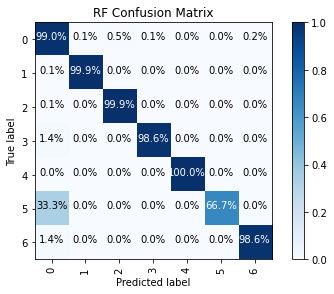

In [10]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, title='RF Confusion Matrix', classes=['0', '1', '2', '3', '4', '5', '6'])

In [17]:
from sklearn.model_selection import StratifiedKFold

def kfold(model, X, y):
    scores = []
    skfold = StratifiedKFold(n_splits = 4)

    for train_index, test_index in skfold.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        scores.append(accuracy_score(y_test, model.predict(X_test)))
    return scores

In [18]:
results = kfold(clf, X_train, y_train)
np.mean(results)

0.9982185714285715